# Étude de l'erreur due à la diffusion et à la convection dans le cas du SWARM

In [1]:
import sys

sys.path = ['/home/as259691/PycharmProjects/FluidDyn1D'] + sys.path

In [2]:
from src.main import *
from src.plot_fields import *

# %matplotlib inline
rc('figure', figsize=(10,5))
rc('figure', dpi=100)

## Paramètres de la simulation

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

In [3]:
# d = 6./100*Delta/2.
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                              alpha=0.06, a_i=357.)
markers = Bulles(phy_prop=phy_prop)
Formulation = [Problem, ProblemConserv2]

n = 1000
t_fin = 0.2

In [4]:
def compare_energy_forme(formu, phy_prop, num_prop, markers, t_fin):
    fig1,ax1 = plt.subplots(1)
    ax1.set_title('Énergie en fonction du temps')
    for form in formu:
        print()
        prob = form(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
        E0 = prob.energy
        print(prob.name)
        print('==========================')
        t, e = prob.timestep(t_fin=t_fin, number_of_plots=5, debug=False, plotter=Plotter('decale'))
        l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
        n = len(e)
        i0 = int(n/5)
        dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
        # par Dt / rho_cp_l T_l V
        print('dE*/dt* = %g' % dedt_adim)
    le = fig1.legend()

## Étude selon la formulation de l'équation

En fait s'il n'y a pas de convection il n'y a pas de différence entre les différentes formes, à l'exception de la moyenne utilisée pour $\frac{1}{\rho C_p}$

### RK4


dt fourier
6.918433404737903e-06
Cas : mixte, rk4, weno, dx = 3.90625e-05, dt = 6.91843e-06, cfl = 0.0354224
dE*/dt* = -0.000006

dt fourier
6.918433404737903e-06
Forme conservative boniou, Cas : mixte, rk4, weno, dx = 3.90625e-05, dt = 6.91843e-06, cfl = 0.0354224
dE*/dt* = 0.000022


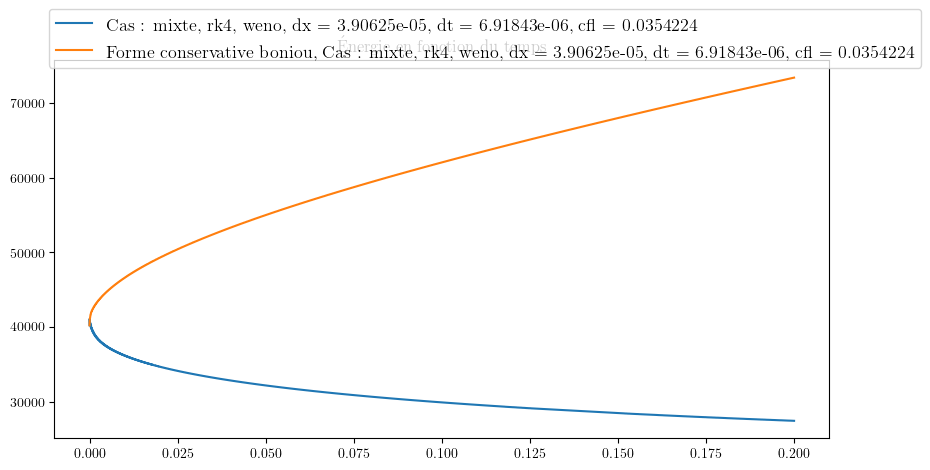

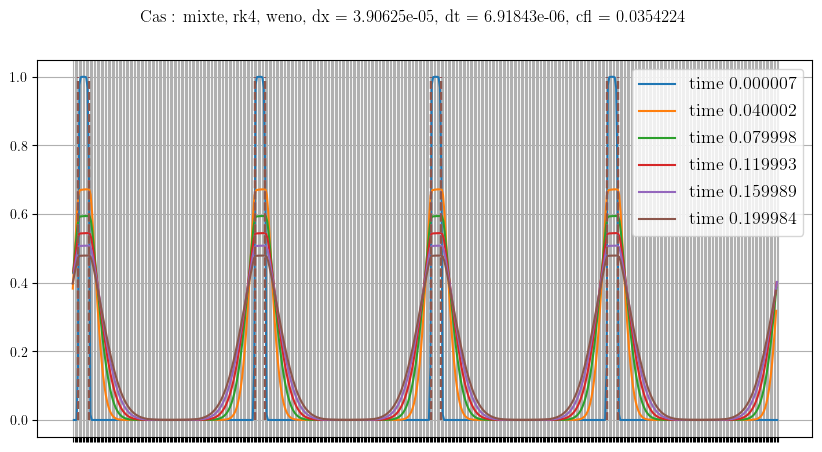

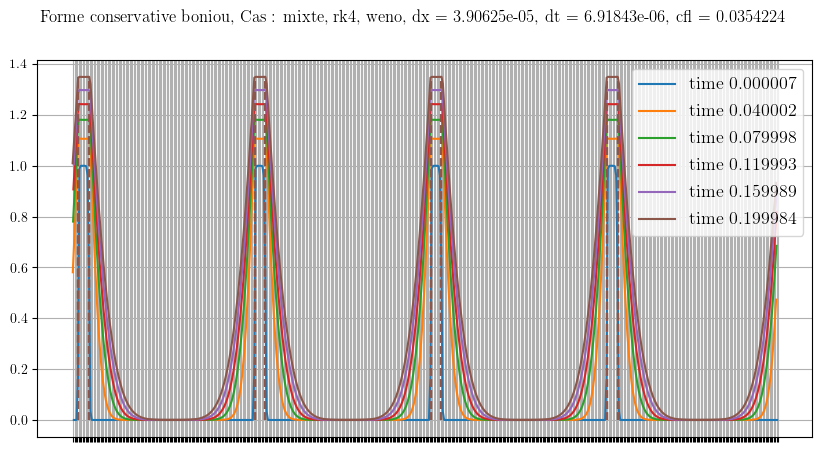

In [5]:
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno', time_scheme='rk4', phy_prop=phy_prop, cfl=0.5)
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

### Euler

In [6]:
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno', time_scheme='euler', phy_prop=phy_prop)


dt fourier
6.918433404737903e-06
Cas : mixte, euler, weno, dx = 3.90625e-05, dt = 6.91843e-06, cfl = 0.0354224
dE*/dt* = -0.000005

dt fourier
6.918433404737903e-06
Forme conservative boniou, Cas : mixte, euler, weno, dx = 3.90625e-05, dt = 6.91843e-06, cfl = 0.0354224
dE*/dt* = 0.000023


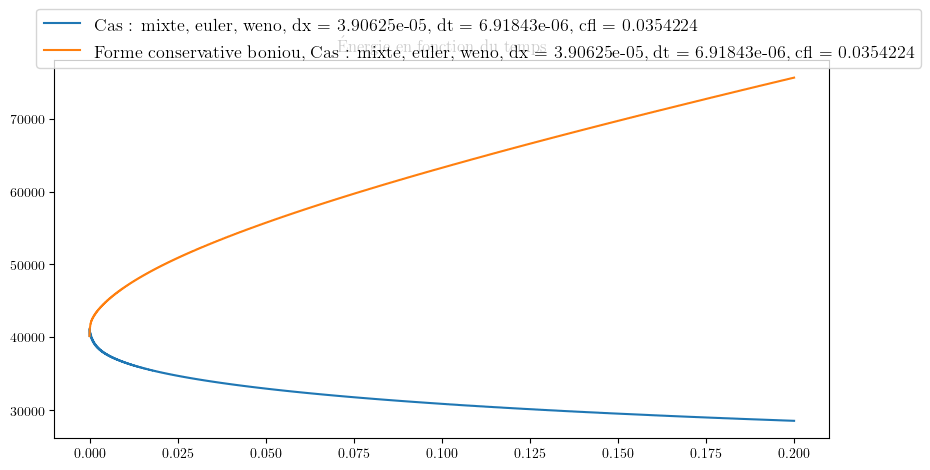

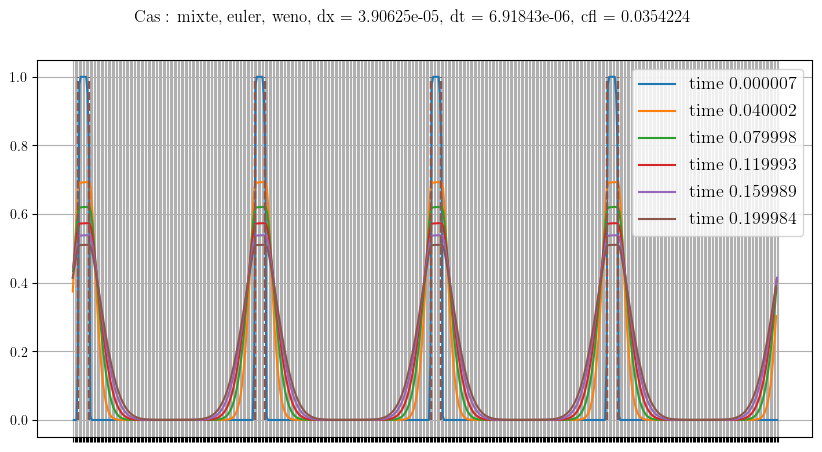

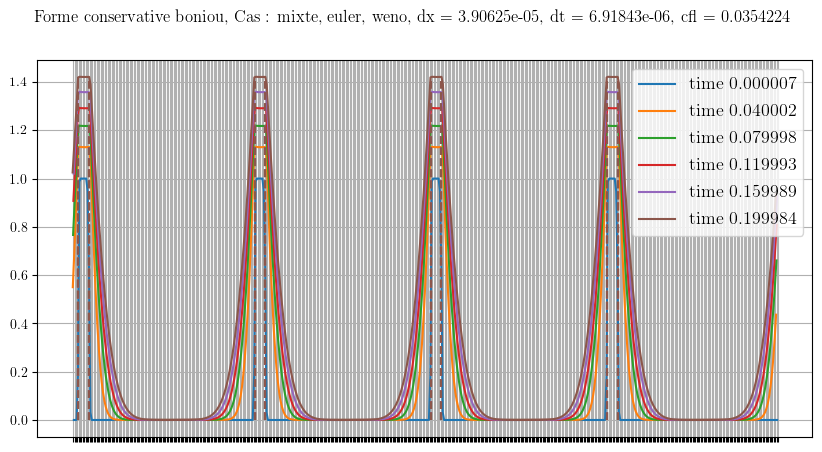

In [7]:
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

## Cas boniou, euler avec weno et upwind quand le stencil traverse l'interface


dt fourier
6.918433404737903e-06
Cas : mixte, euler, weno upwind, dx = 3.90625e-05, dt = 6.91843e-06, cfl = 0.0354224
dE*/dt* = -0.000006

dt fourier
6.918433404737903e-06
Forme conservative boniou, Cas : mixte, euler, weno upwind, dx = 3.90625e-05, dt = 6.91843e-06, cfl = 0.0354224
dE*/dt* = 0.000005


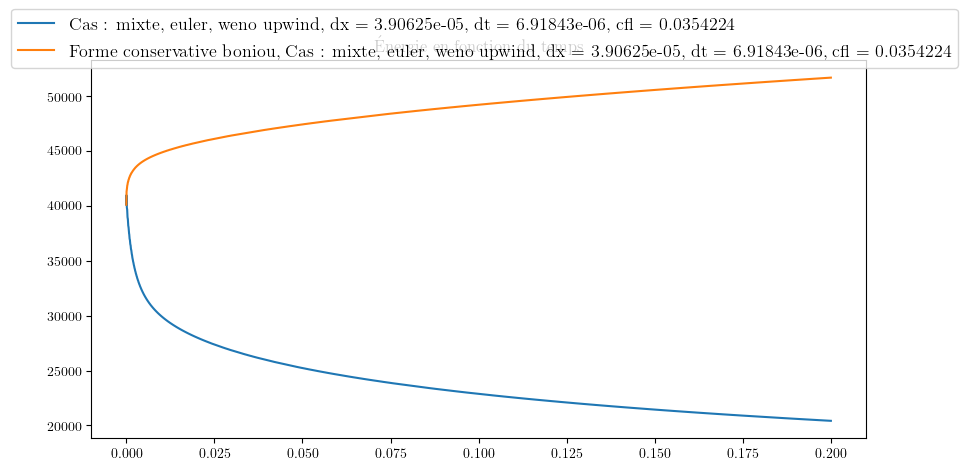

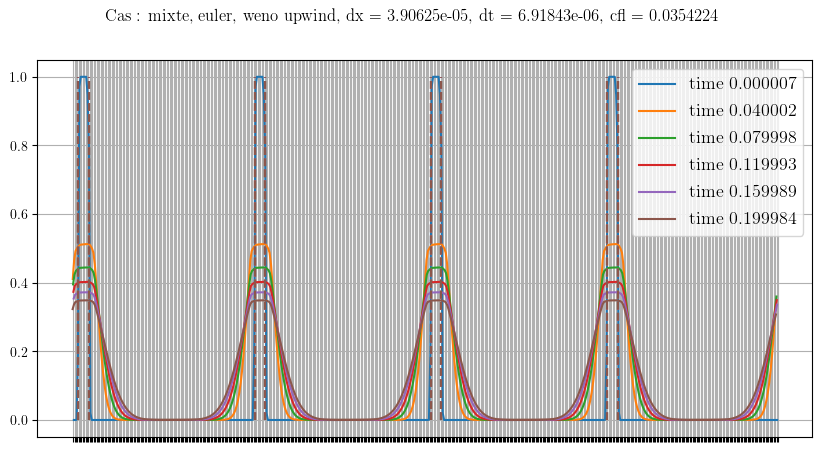

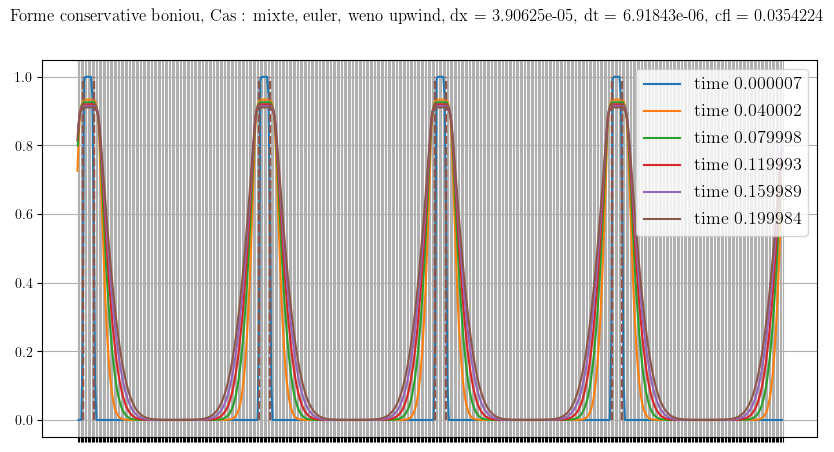

In [8]:
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno upwind', time_scheme='euler', phy_prop=phy_prop)
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

# Étude numérique

## Étude en $\Delta x$


dt fourier
6.896863867106643e-08
Cas : mixte, euler, weno upwind, dx = 3.90016e-06, dt = 6.89686e-08, cfl = 0.00353671
dE*/dt* = -0.000000

dt fourier
6.896863867106643e-08
Forme conservative boniou, Cas : mixte, euler, weno upwind, dx = 3.90016e-06, dt = 6.89686e-08, cfl = 0.00353671
dE*/dt* = 0.000000

dt fourier
6.918433404737903e-06
Cas : mixte, euler, weno upwind, dx = 3.90625e-05, dt = 6.91843e-06, cfl = 0.0354224
dE*/dt* = -0.000103

dt fourier
6.918433404737903e-06
Forme conservative boniou, Cas : mixte, euler, weno upwind, dx = 3.90625e-05, dt = 6.91843e-06, cfl = 0.0354224
dE*/dt* = 0.000034

dt fourier
4.538601983461999e-07
Cas : mixte, euler, weno upwind, dx = 1.0005e-05, dt = 4.5386e-07, cfl = 0.00907267
dE*/dt* = -0.000004

dt fourier
4.538601983461999e-07
Forme conservative boniou, Cas : mixte, euler, weno upwind, dx = 1.0005e-05, dt = 4.5386e-07, cfl = 0.00907267
dE*/dt* = 0.000001


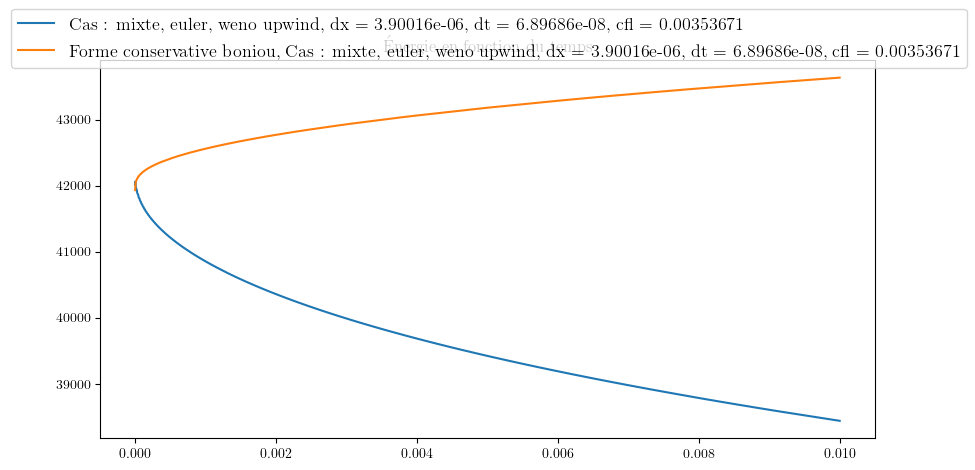

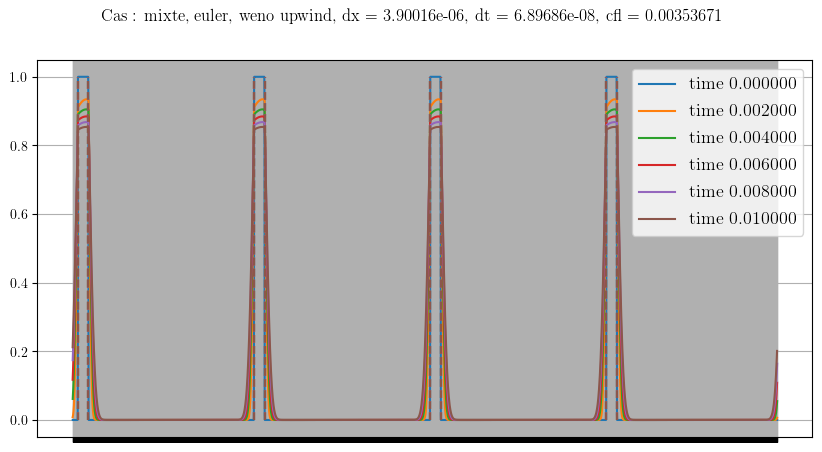

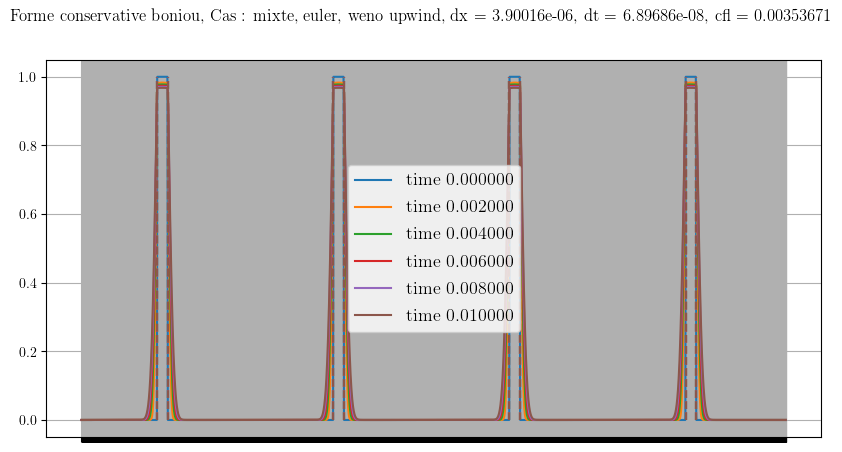

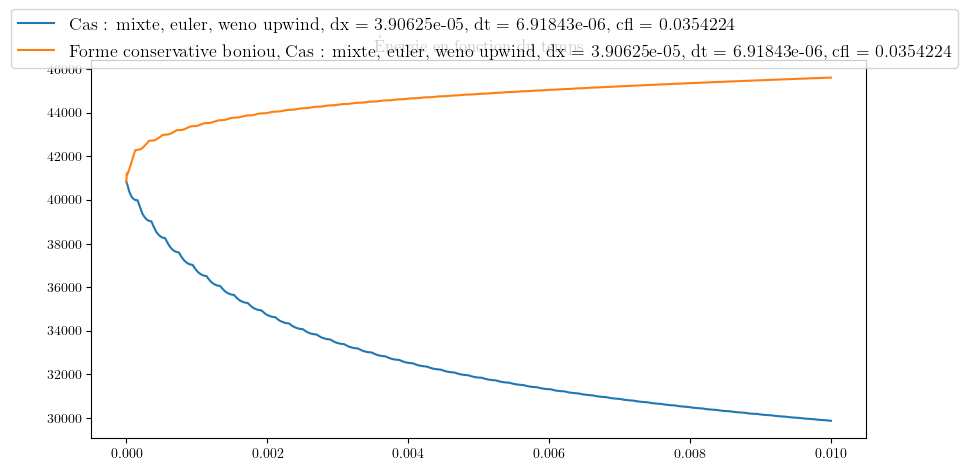

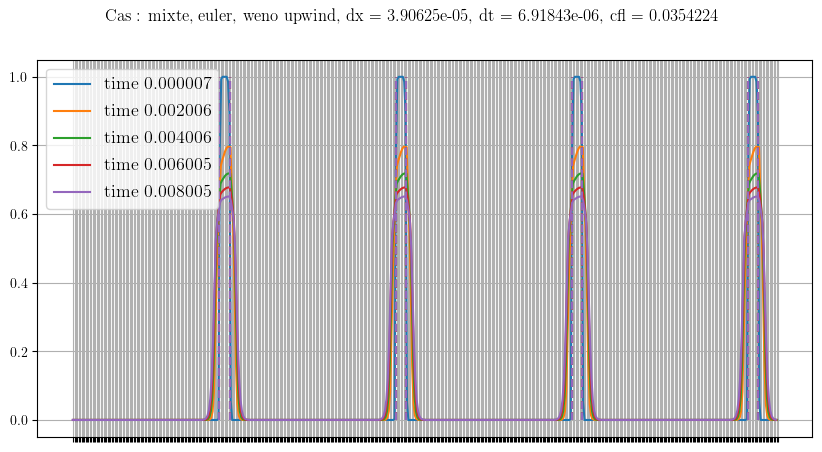

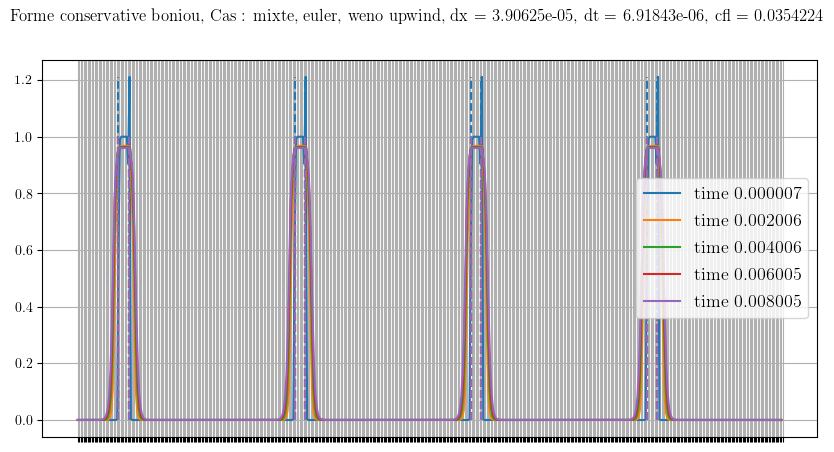

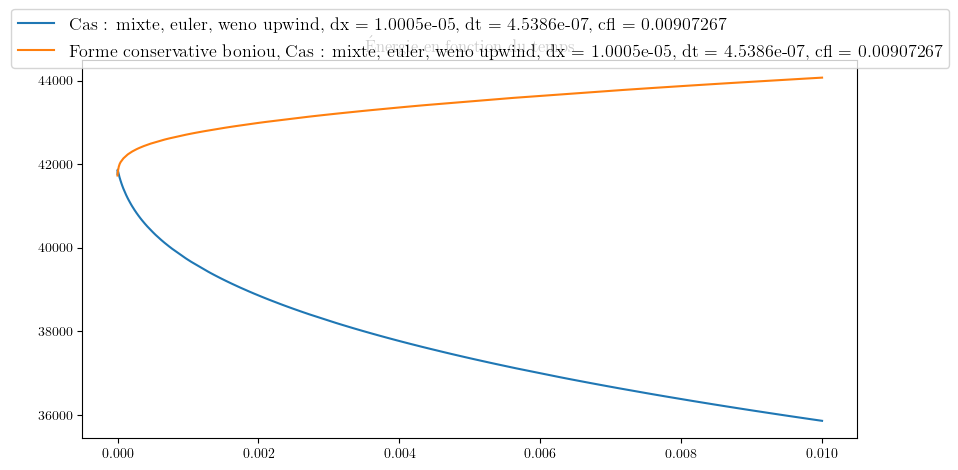

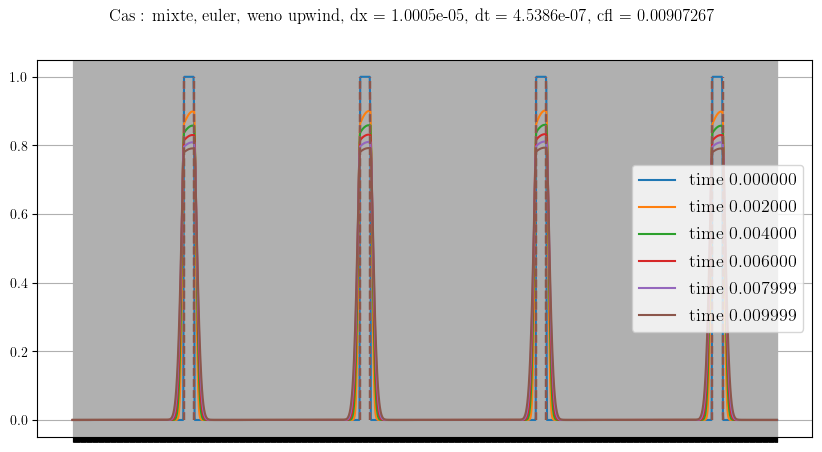

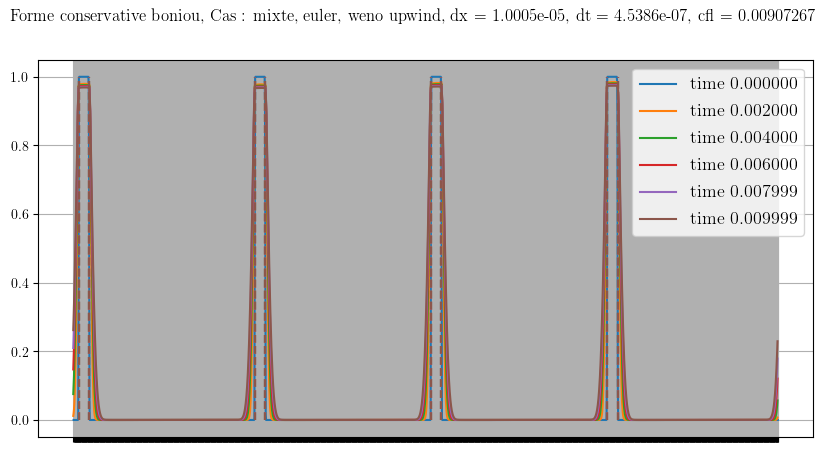

In [9]:
dx_list = [3.9*10**-6, 3.9*10**-5, 1*10**-5]
t_fin = 0.01
for dx in dx_list:
    num_prop = NumericalProperties(dx=dx, schema='weno upwind', time_scheme='euler', phy_prop=phy_prop)
    compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)


dt fourier
2.232841866976439e-05
Cas : mixte, euler, weno upwind, dx = 7.01754e-05, dt = 2.23284e-05, cfl = 0.063636
dE*/dt* = -0.000469

dt fourier
2.232841866976439e-05
Forme conservative boniou, Cas : mixte, euler, weno upwind, dx = 7.01754e-05, dt = 2.23284e-05, cfl = 0.063636
dE*/dt* = 0.000172


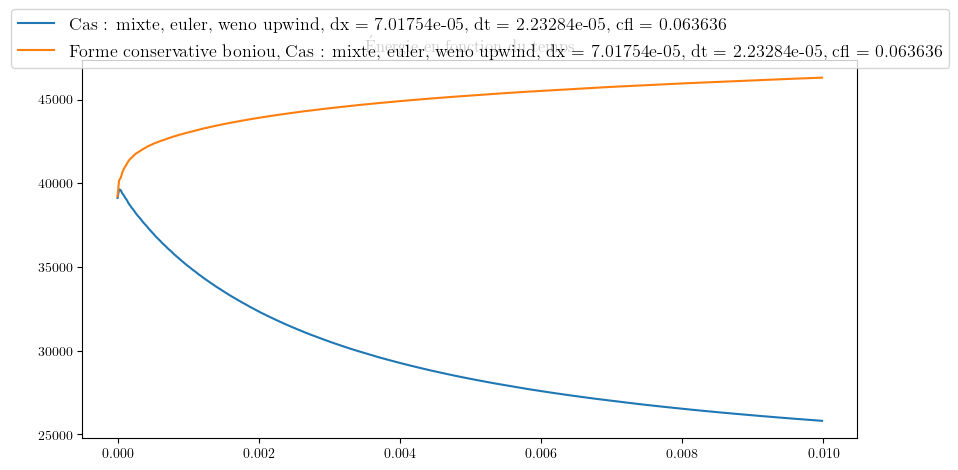

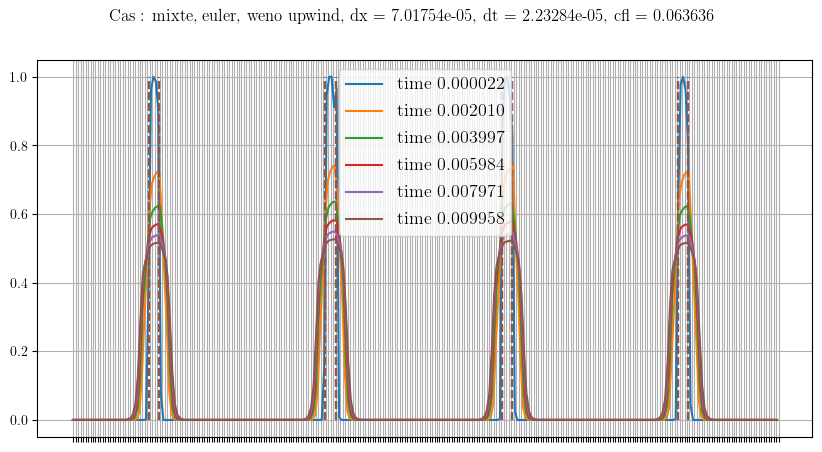

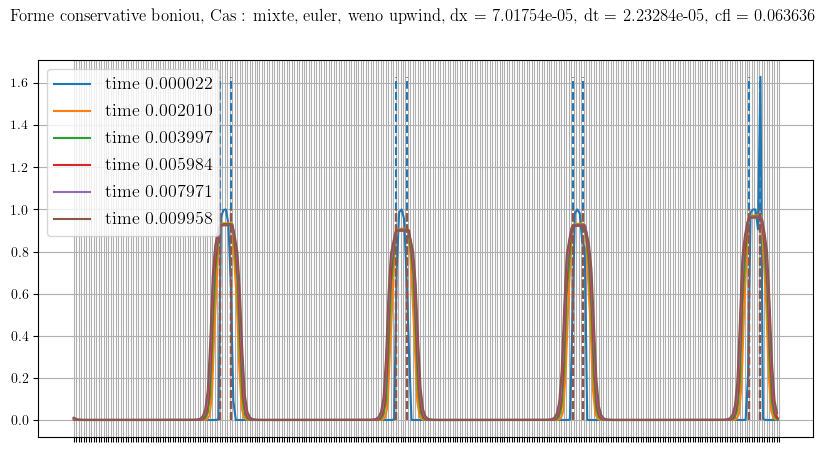

In [10]:
dx_list = [7*10**-5]
t_fin = 0.01
for dx in dx_list:
    num_prop = NumericalProperties(dx=dx, schema='weno upwind', time_scheme='euler', phy_prop=phy_prop)
    compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

## Étude en $\Delta t$

Ici on ne change pas $\Delta x$, mais on diminue dt_min pour qu'il soit contraignant


dt min
2e-05
Cas : mixte, euler, weno upwind, dx = 7.01754e-05, dt = 2e-05, cfl = 0.057
dE*/dt* = -0.000418

dt min
2e-05
Forme conservative boniou, Cas : mixte, euler, weno upwind, dx = 7.01754e-05, dt = 2e-05, cfl = 0.057
dE*/dt* = 0.000154

dt min
1e-05
Cas : mixte, euler, weno upwind, dx = 7.01754e-05, dt = 1e-05, cfl = 0.0285
dE*/dt* = -0.000209

dt min
1e-05
Forme conservative boniou, Cas : mixte, euler, weno upwind, dx = 7.01754e-05, dt = 1e-05, cfl = 0.0285
dE*/dt* = 0.000076

dt min
4.9999999999999996e-06
Cas : mixte, euler, weno upwind, dx = 7.01754e-05, dt = 5e-06, cfl = 0.01425
dE*/dt* = -0.000104

dt min
4.9999999999999996e-06
Forme conservative boniou, Cas : mixte, euler, weno upwind, dx = 7.01754e-05, dt = 5e-06, cfl = 0.01425
dE*/dt* = 0.000038


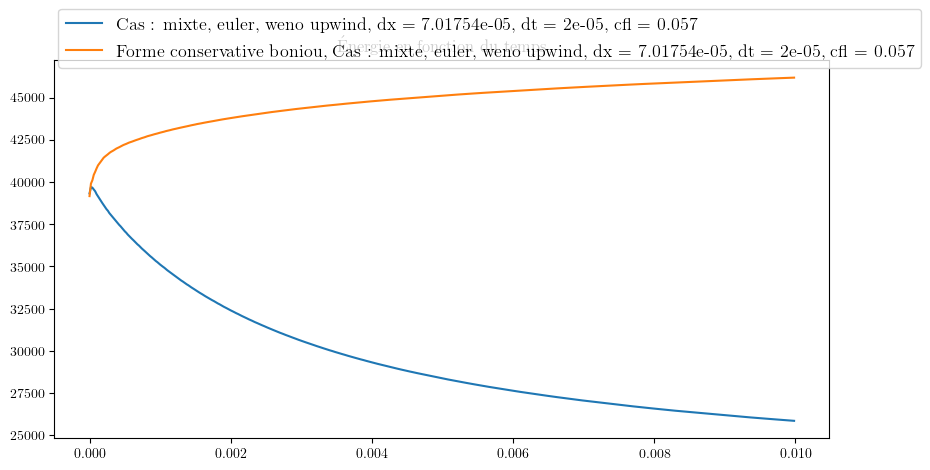

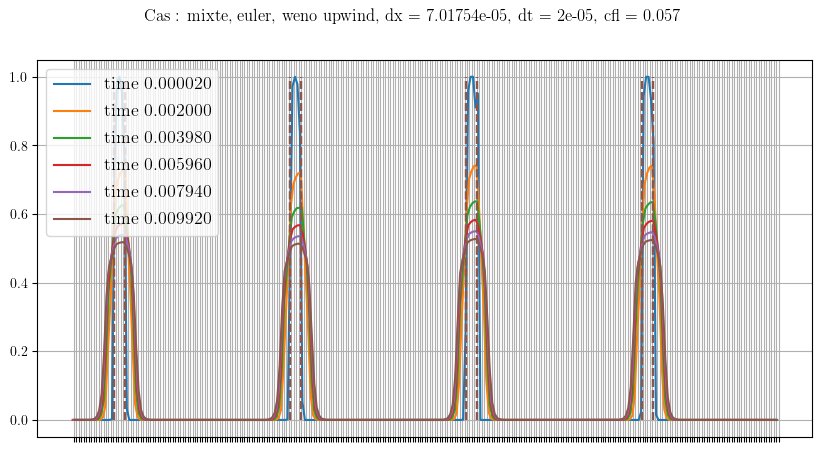

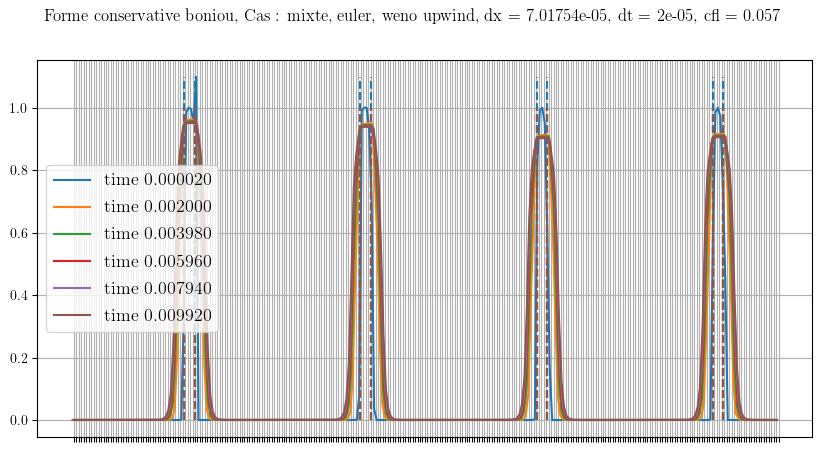

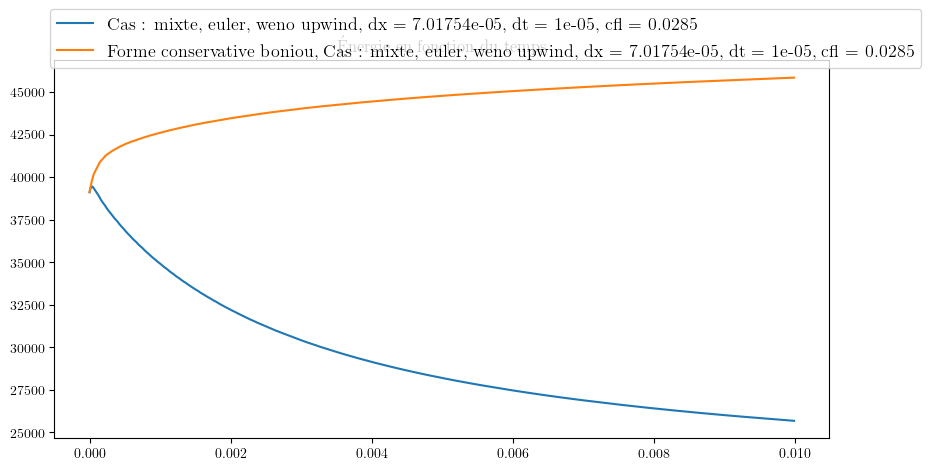

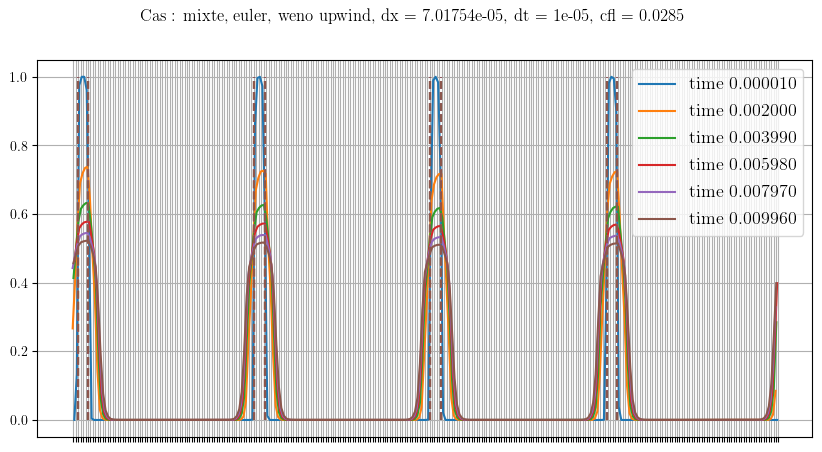

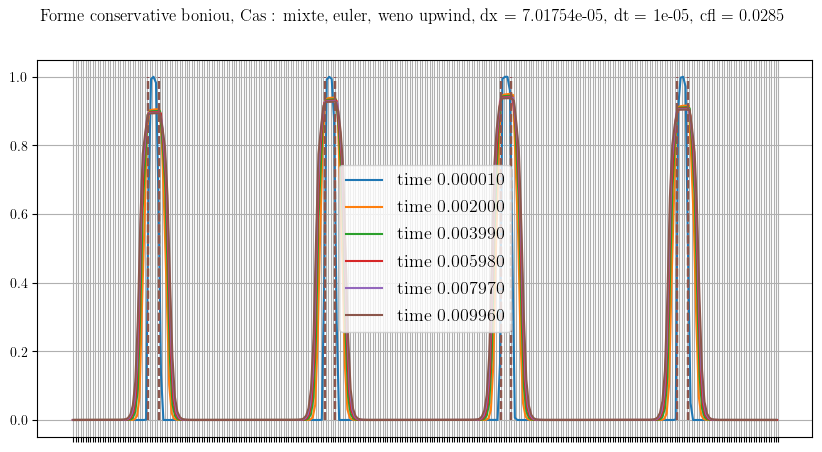

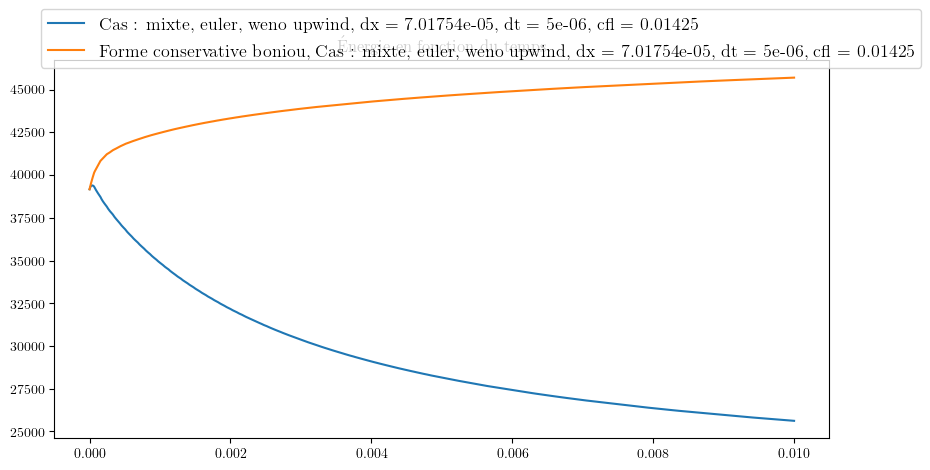

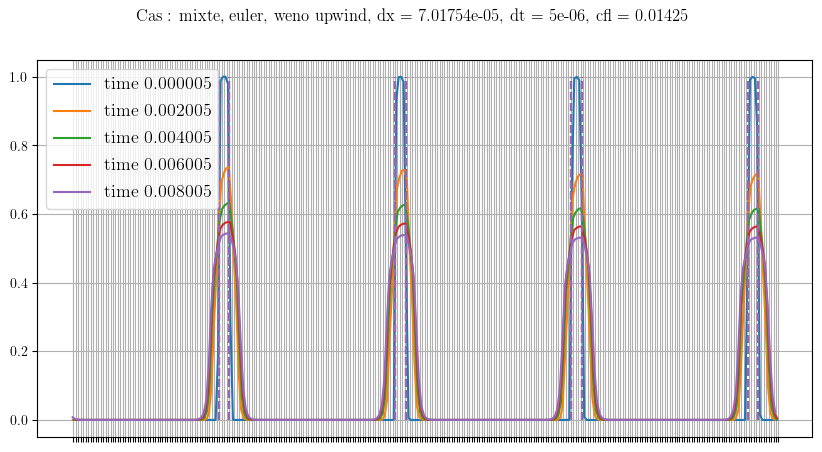

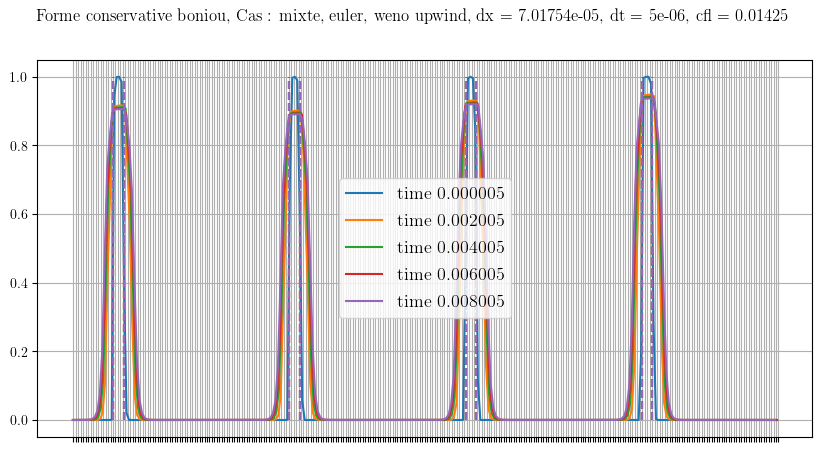

In [11]:
dt_list = [2*10**-5, 1*10**-5, 5*10**-6]
t_fin = 0.01
for dt in dt_list:
    num_prop = NumericalProperties(dx=7*10**-5, schema='weno upwind', time_scheme='euler', phy_prop=phy_prop, dt=dt)
    compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

On n'observe pas de différence notable entre les simulations. Cela laisse à penser que seul le maillage spatial permet de diminuer les pertes d'énergie.

Essayons d'analyser les sources de perte d'énergie.


# Étude qualitative

## Pertes en diffusion pure


dt fourier
2.232841866976439e-05
Cas : diffusion, euler, weno upwind, dx = 7.01754e-05, dt = 2.23284e-05
dE*/dt* = 0.000010

dt fourier
2.232841866976439e-05
Forme conservative boniou, Cas : diffusion, euler, weno upwind, dx = 7.01754e-05, dt = 2.23284e-05
dE*/dt* = -0.000000


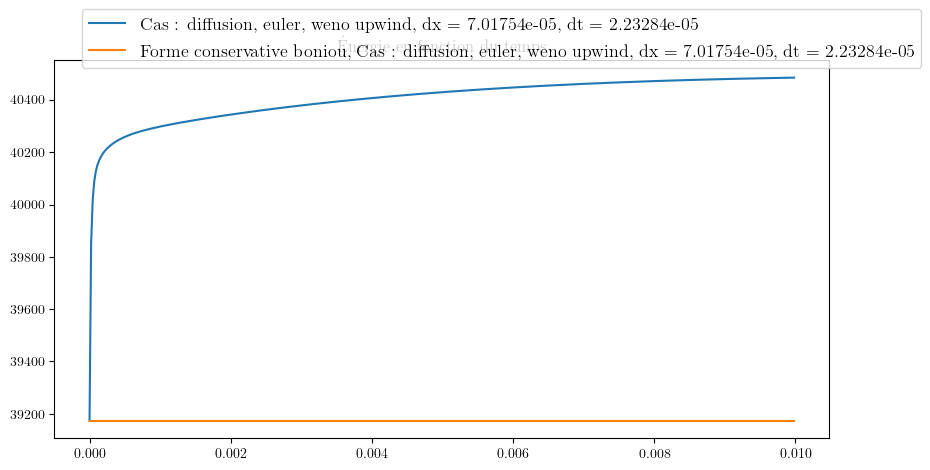

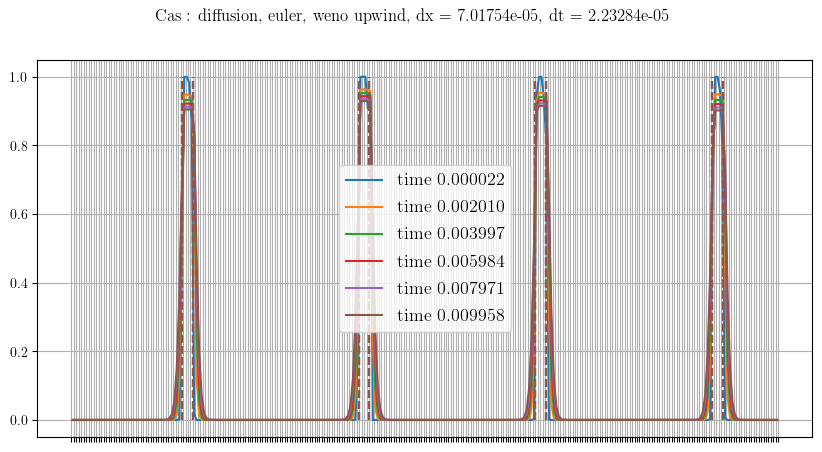

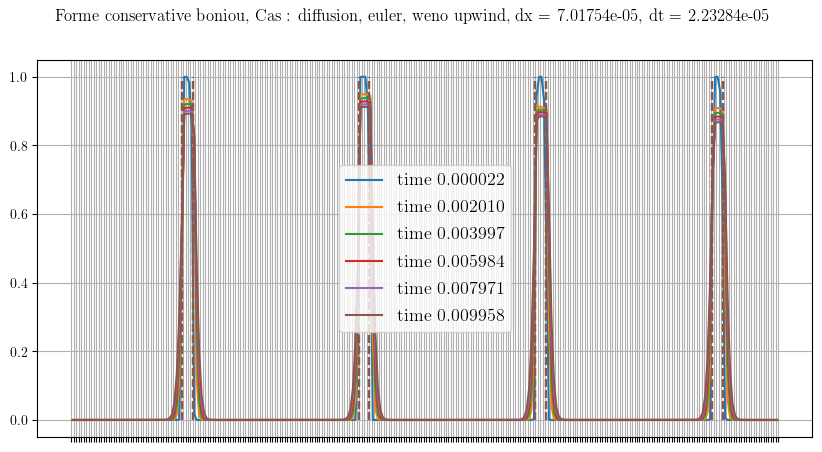

In [12]:
t_fin = 0.01
phy_prop = PhysicalProperties(Delta=0.02, v=0., dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                              alpha=0.06, a_i=357.)
num_prop = NumericalProperties(dx=7*10**-5, schema='weno upwind', time_scheme='euler', phy_prop=phy_prop)
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

## Perte d'énergie en convection pure


dt fourier
2.232841866976439e-05
Cas : convection, euler, weno upwind, dx = 7.01754e-05, cfl = 0.063636
dE*/dt* = -0.000576

dt fourier
2.232841866976439e-05
Forme conservative boniou, Cas : convection, euler, weno upwind, dx = 7.01754e-05, cfl = 0.063636
dE*/dt* = 0.000166


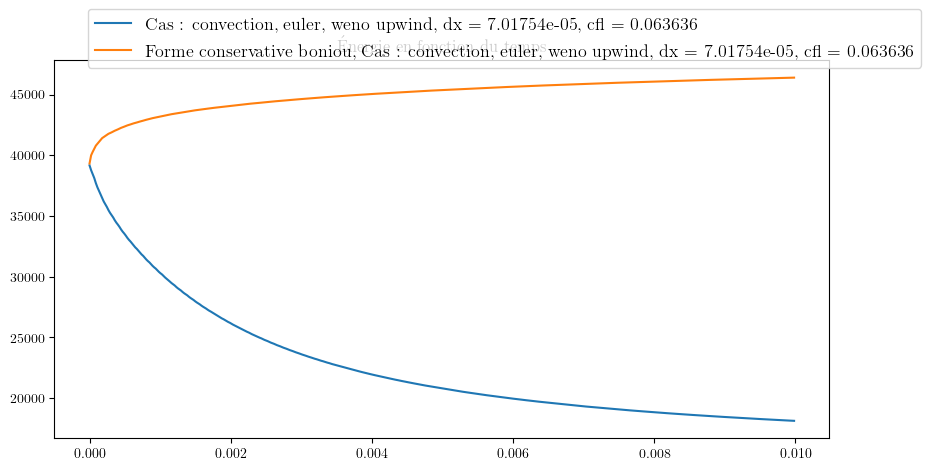

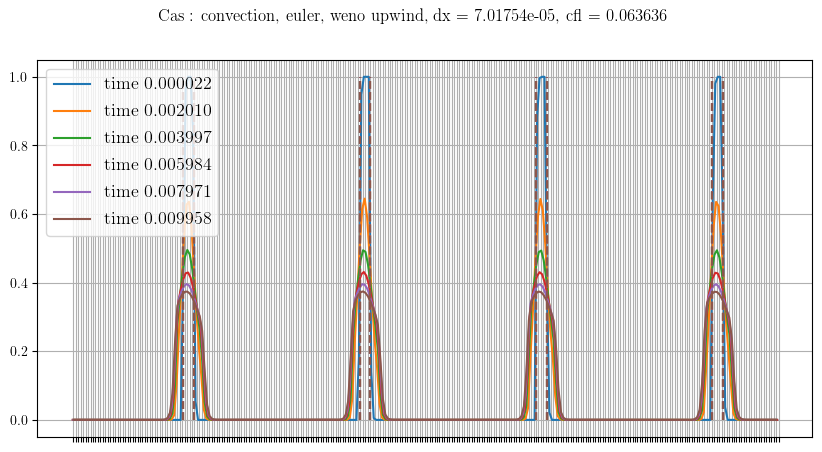

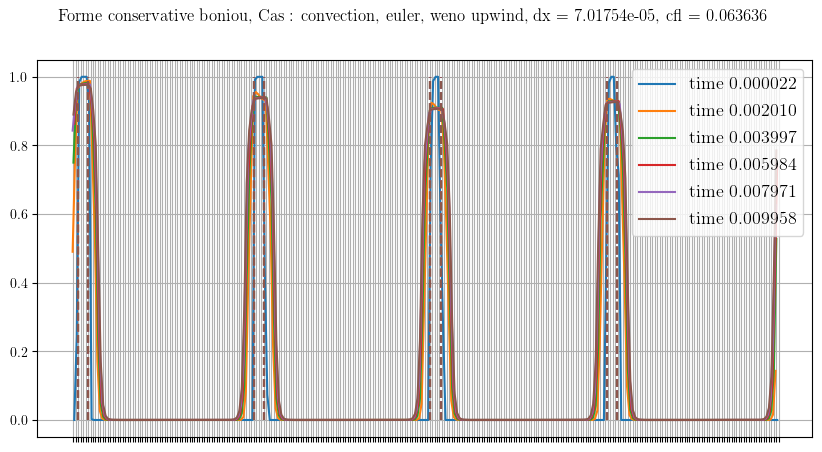

In [13]:
t_fin = 0.01
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=0.,
                              alpha=0.06, a_i=357.)
num_prop = NumericalProperties(dx=7*10**-5, schema='weno upwind', time_scheme='euler', phy_prop=phy_prop)
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

## Étude selon les schémas numériques

In [14]:
Schemas = ['upwind', 'center', 'weno', 'weno upwind']
Time_scheme = ['euler', 'rk4']
def compare_energy_schema(schemas, form, time_scheme, phy_prop, markers, t_fin):
    fig1,ax1 = plt.subplots(1)
    ax1.set_title('Énergie en fonction du temps')
    for schem in schemas:
        for ts in time_scheme:
            a = Plotter('decale')
            num_prop = NumericalProperties(dx=3*10**-5, schema=schem, time_scheme=ts, phy_prop=phy_prop)
            print()
            prob = form(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
            E0 = prob.energy
            print(prob.name)
            print('==========================')
            t, e = prob.timestep(t_fin=t_fin, number_of_plots=5, debug=False, plotter=a)
            a.ax.set_xlim(0., phy_prop.Delta/2)
            a.ax.set_ylim(0.6, 1.1)
            l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
            n = len(e)
            i0 = int(n/5)
            dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
            # par Dt / rho_cp_l T_l V
            print('dE*/dt* = %f' % dedt_adim)
    le = fig1.legend()


dt fourier
4.538601983461999e-07
Cas : convection, rk4, weno, dx = 1.0005e-05, cfl = 0.00907267

dt fourier
1.1335161290322582e-07
Cas : convection, rk4, weno, dx = 5e-06, cfl = 0.00453406
dE*/dt* = -0.000000


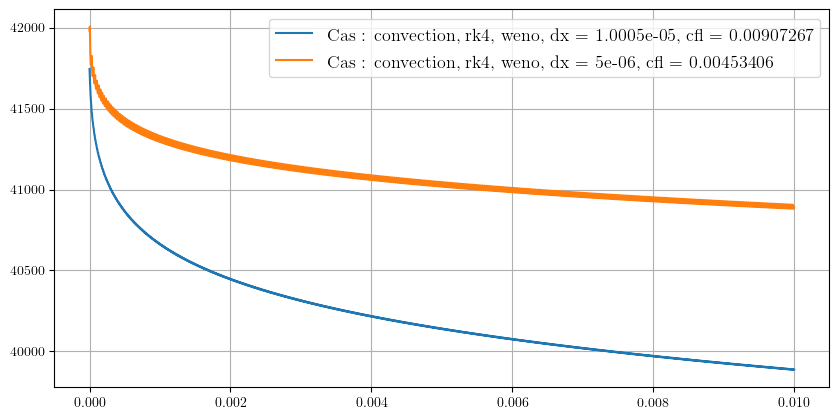

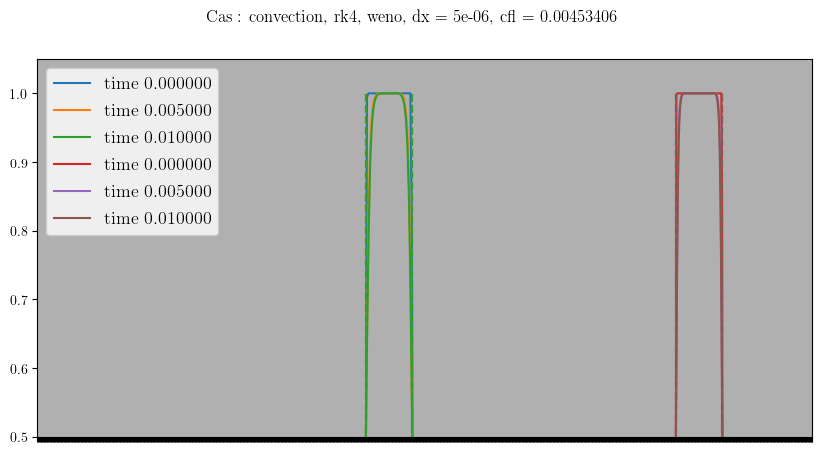

In [15]:
t_fin = 0.01
fig1, ax1 = plt.subplots(1)
a = Plotter('decale')
num_prop = NumericalProperties(dx=1*10**-5, schema='weno', time_scheme='rk4', phy_prop=phy_prop)
print()
prob_ref = Problem(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob_ref.energy
print(prob_ref.name)
print('==========================')
t, e = prob_ref.timestep(t_fin=t_fin, number_of_plots=2, debug=False, plotter=a)
a.ax.set_ylim(0.5,1.05)
a.ax.set_xlim(0., phy_prop.Delta/4.)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_ref.name)
ax1.legend()
ax1.grid(b=True)
n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt / E0  # on a mult

num_prop = NumericalProperties(dx=5*10**-6, schema='weno', time_scheme='rk4', phy_prop=phy_prop)
print()
prob_ref = Problem(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob_ref.energy
print(prob_ref.name)
print('==========================')
t, e = prob_ref.timestep(t_fin=t_fin, number_of_plots=2, debug=False, plotter=a)
a.ax.set_ylim(0.5,1.05)
a.ax.set_xlim(0., phy_prop.Delta/4.)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_ref.name)
ax1.legend()
ax1.grid(b=True)
n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print('dE*/dt* = %f' % dedt_adim)


dt fourier
4.0888316389624144e-06
Cas : convection, euler, upwind, dx = 3.003e-05, cfl = 0.0272316
dE*/dt* = -0.000129

dt fourier
4.0888316389624144e-06
Cas : convection, rk4, upwind, dx = 3.003e-05, cfl = 0.0272316
dE*/dt* = -0.000130

dt fourier
4.0888316389624144e-06
Cas : convection, euler, weno, dx = 3.003e-05, cfl = 0.0272316
dE*/dt* = -0.000009

dt fourier
4.0888316389624144e-06
Cas : convection, rk4, weno, dx = 3.003e-05, cfl = 0.0272316
dE*/dt* = -0.000017

dt fourier
4.0888316389624144e-06
Cas : convection, euler, weno upwind, dx = 3.003e-05, cfl = 0.0272316
dE*/dt* = -0.000081

dt fourier
4.0888316389624144e-06
Cas : convection, rk4, weno upwind, dx = 3.003e-05, cfl = 0.0272316
dE*/dt* = -0.000083


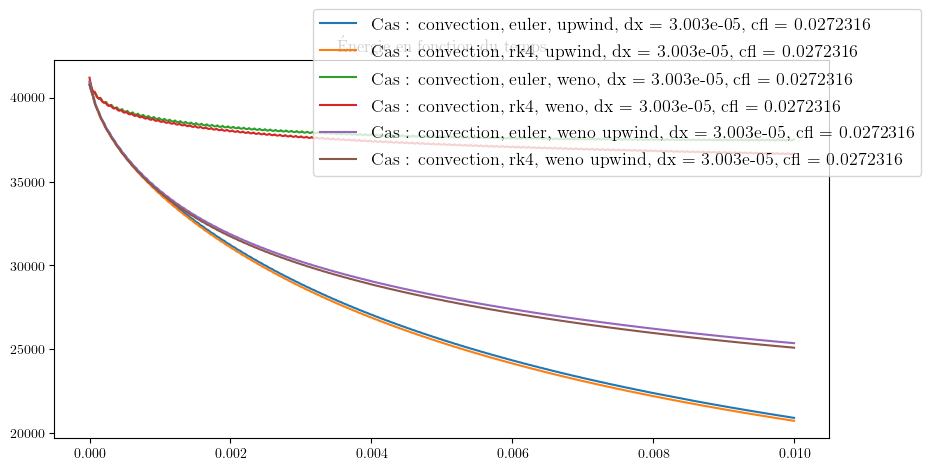

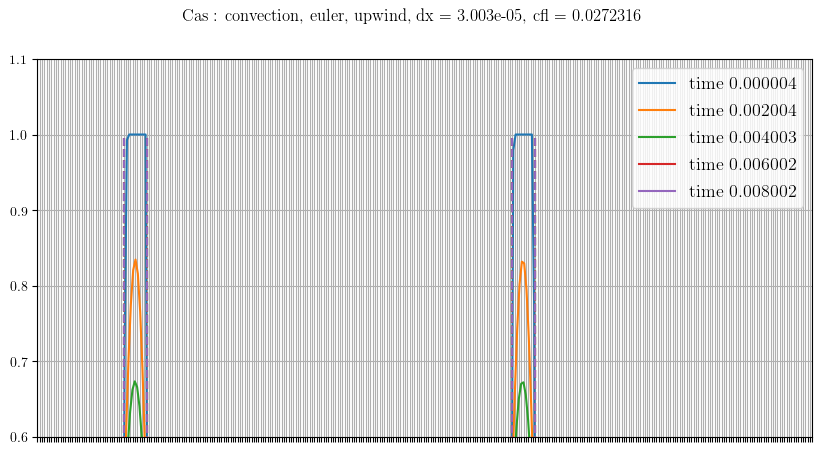

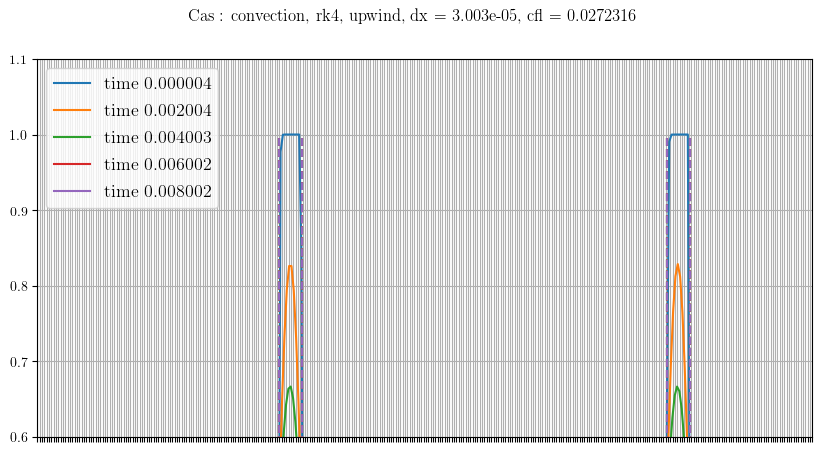

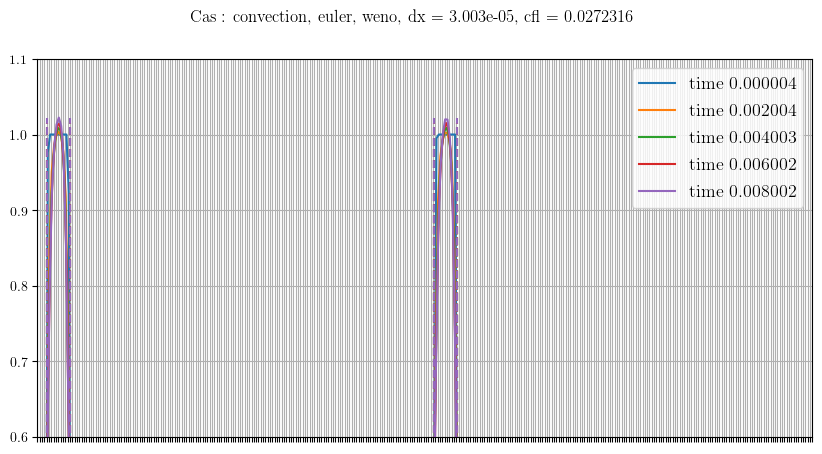

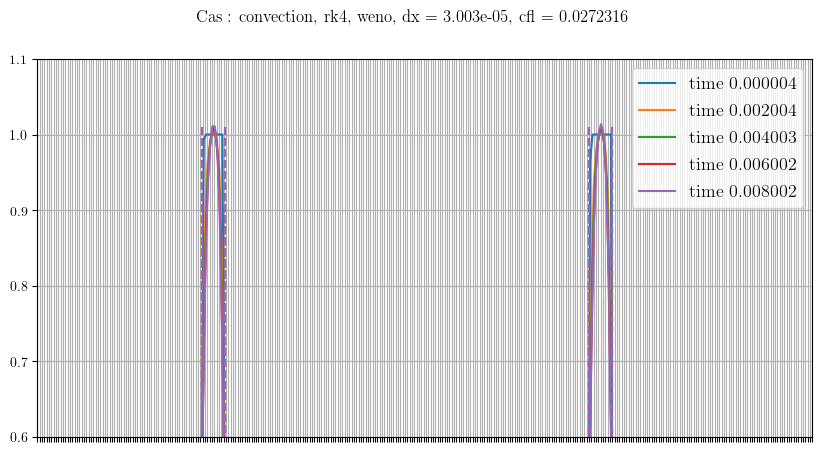

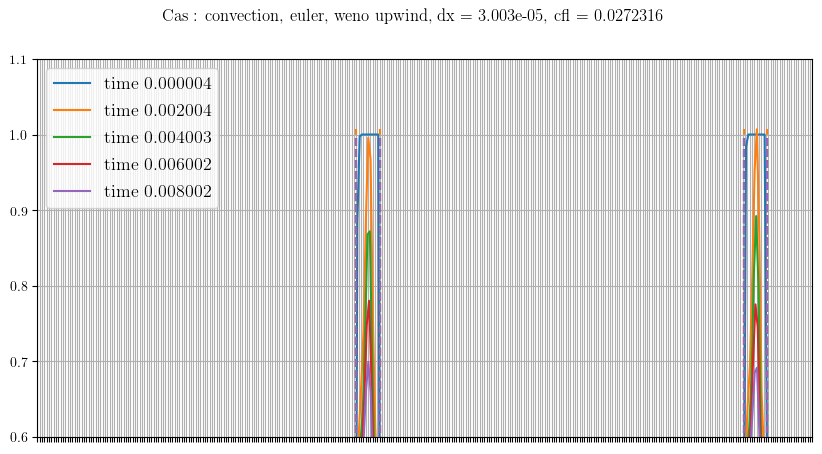

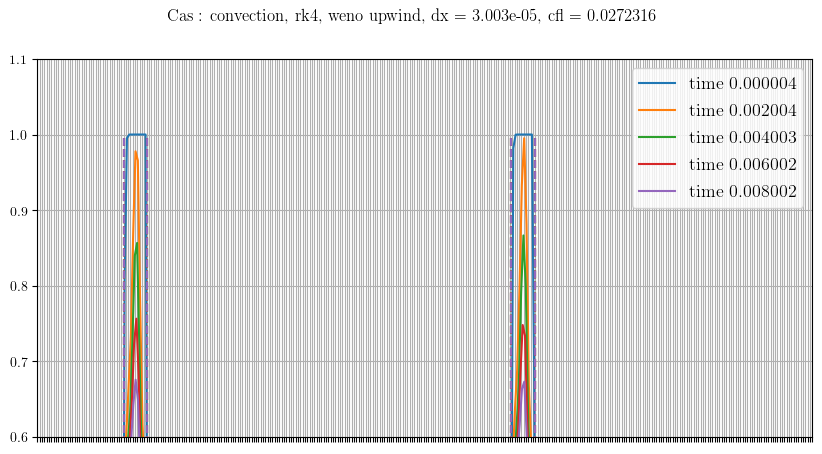

In [16]:
t_fin = 0.01
Schemas = ['upwind', 'weno', 'weno upwind']
compare_energy_schema(Schemas, Problem, Time_scheme, phy_prop, markers, t_fin)


dt fourier
4.0888316389624144e-06
Forme conservative boniou, Cas : convection, euler, upwind, dx = 3.003e-05, cfl = 0.0272316
dE*/dt* = 0.000033

dt fourier
4.0888316389624144e-06
Forme conservative boniou, Cas : convection, rk4, upwind, dx = 3.003e-05, cfl = 0.0272316
dE*/dt* = 0.000032

dt fourier
4.0888316389624144e-06
Forme conservative boniou, Cas : convection, euler, weno, dx = 3.003e-05, cfl = 0.0272316
dE*/dt* = 0.000011

dt fourier
4.0888316389624144e-06
Forme conservative boniou, Cas : convection, rk4, weno, dx = 3.003e-05, cfl = 0.0272316
dE*/dt* = 0.000015

dt fourier
4.0888316389624144e-06
Forme conservative boniou, Cas : convection, euler, weno upwind, dx = 3.003e-05, cfl = 0.0272316
dE*/dt* = 0.000014

dt fourier
4.0888316389624144e-06
Forme conservative boniou, Cas : convection, rk4, weno upwind, dx = 3.003e-05, cfl = 0.0272316
dE*/dt* = 0.000014


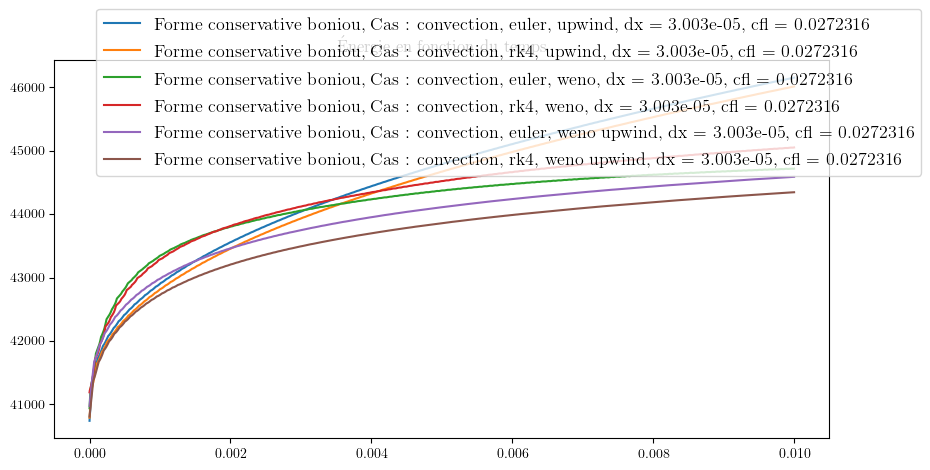

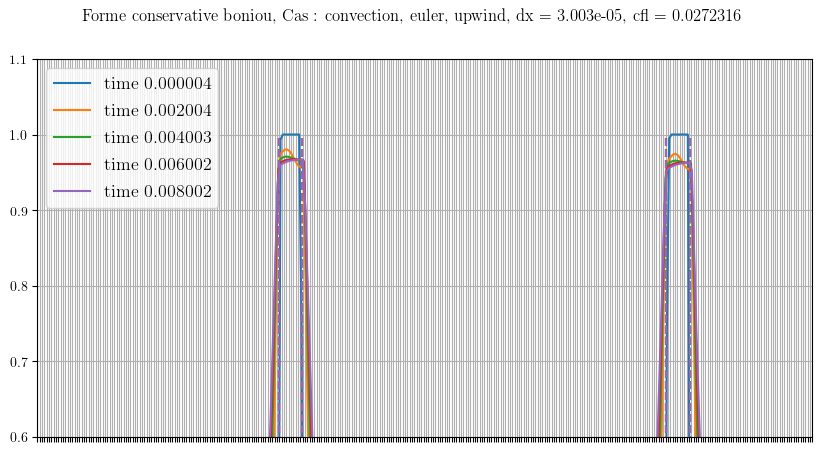

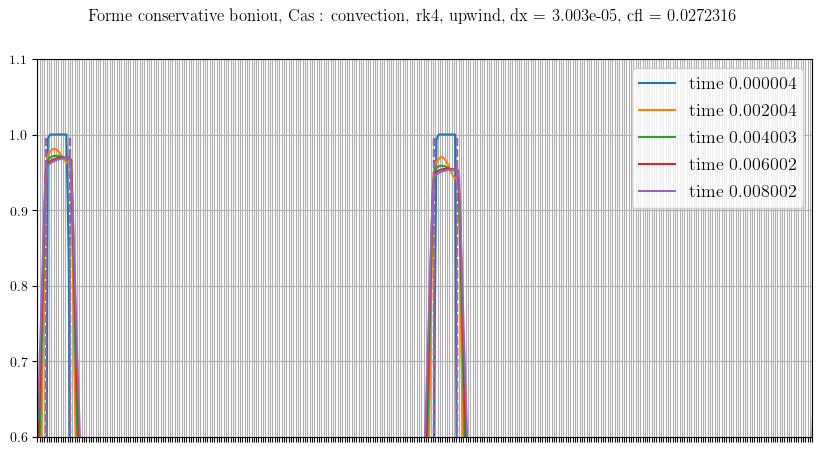

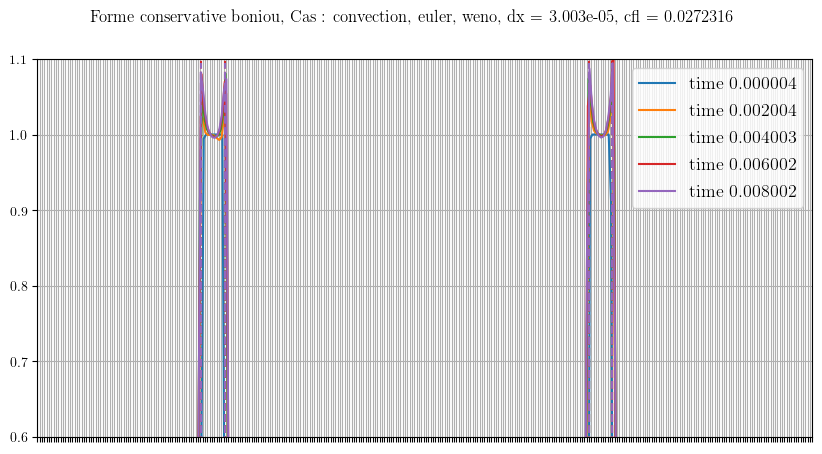

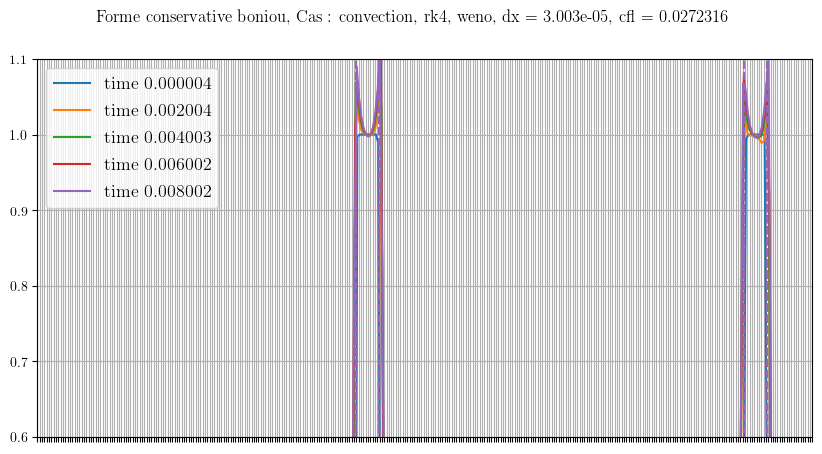

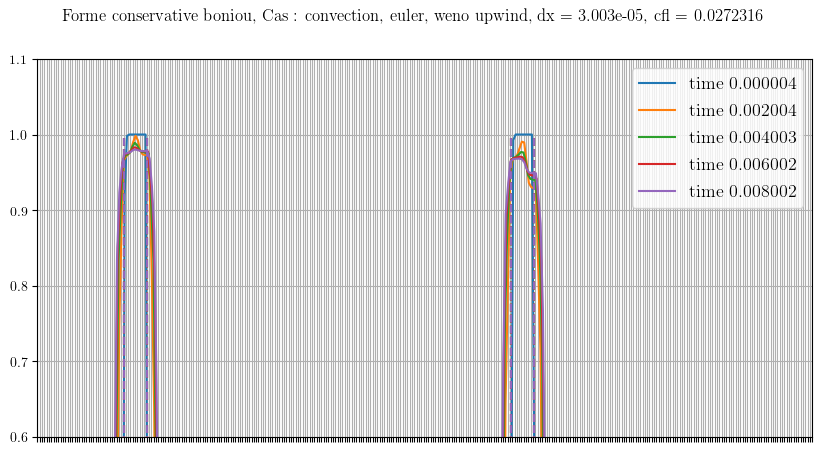

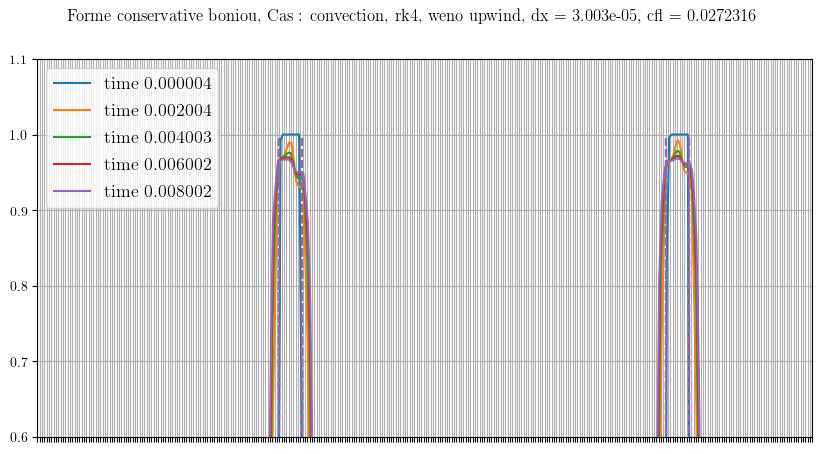

In [17]:
Schemas = ['upwind', 'weno', 'weno upwind']
Time_scheme = ['euler', 'rk4']
compare_energy_schema(Schemas, ProblemConserv2, Time_scheme, phy_prop, markers, t_fin)

# Profiling du code


dt fourier
2.232841866976439e-05
Cas : convection, rk4, weno upwind, dx = 7.01754e-05, cfl = 0.063636
dE*/dt* = -0.000018

dt fourier
2.232841866976439e-05
Forme conservative boniou, Cas : convection, rk4, weno upwind, dx = 7.01754e-05, cfl = 0.063636
dE*/dt* = 0.000018
Timer unit: 1e-06 s

Total time: 13.7396 s
File: /home/as259691/PycharmProjects/FluidDyn1D/src/main.py
Function: integrale_volume_div at line 10

Line #      Hits         Time  Per Hit   % Time  Line Contents
    10                                           def integrale_volume_div(center_value, face_value, I=None, cl=1, dS=1., schema='weno'):
    11                                               """
    12                                               Calcule le delta de convection aux bords des cellules
    13                                               :param dS:
    14                                               :param schema:
    15                                               :param center_value: les valeurs 

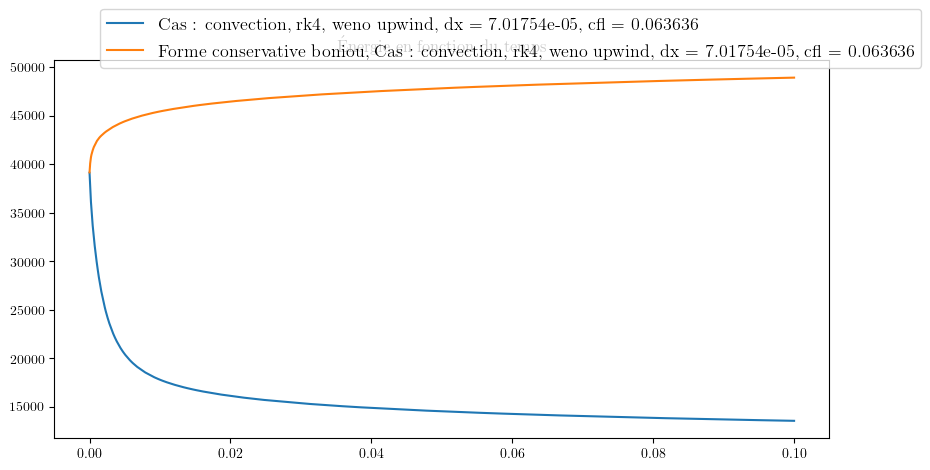

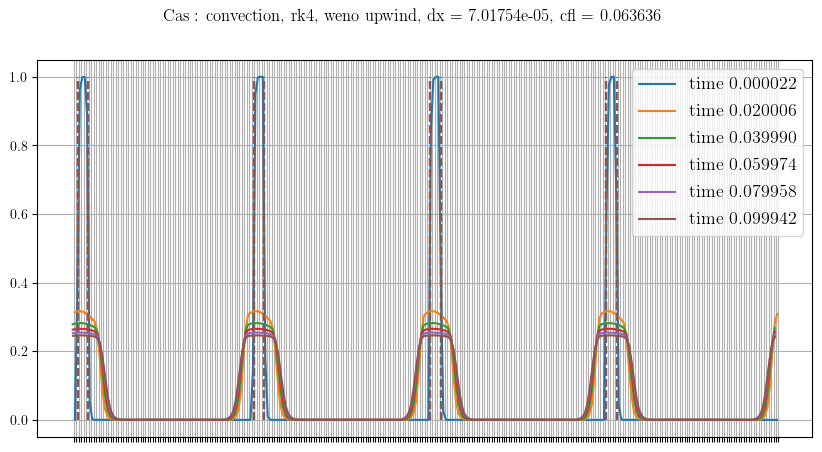

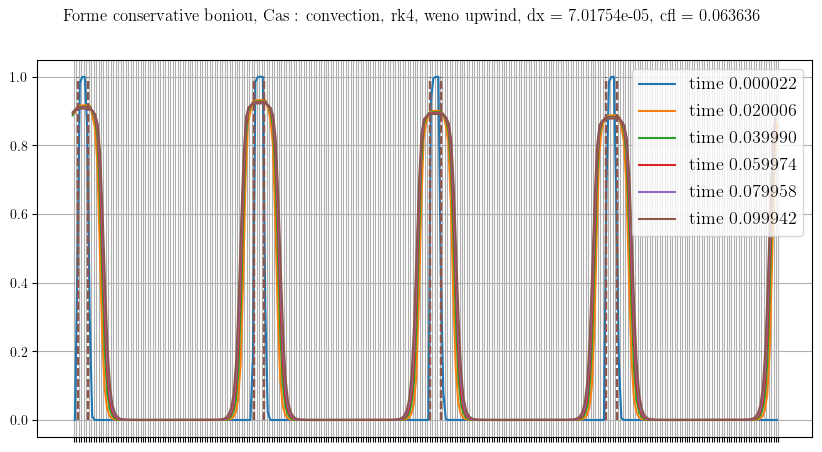

In [18]:
from line_profiler import LineProfiler
num_prop = NumericalProperties(dx=7*10**-5, schema='weno upwind', time_scheme='rk4', phy_prop=phy_prop, dt=1.)
lp = LineProfiler()
func = [Problem.rk4_timestep, Bulles.indicatrice_liquide, interpolate_form_center_to_face_weno,
       integrale_volume_div]
for fu in func:
    lp.add_function(fu)   # add additional function to profile
lp_wrapper = lp(compare_energy_forme)
lp_wrapper(Formulation, phy_prop, num_prop, markers, 0.1)
lp.print_stats()

# Comparaison des meilleurs cas pour chaque formulation

~~~~~~~~~~~~~~~~~~~~~~~~~~

dt fourier
1.8172585062055175e-06
Cas : convection, rk4, weno, dx = 2.002e-05, cfl = 0.0181544
dE/dt = -1.69281e-13

dt fourier
1.8172585062055175e-06
Forme conservative boniou, Cas : convection, rk4, weno upwind, dx = 2.002e-05, cfl = 0.0181544
dE/dt = 5.65927e-09
~~~~~~~~~~~~~~~~~~~~~~~~~~

dt fourier
7.283608525474247e-06
Cas : convection, rk4, weno, dx = 4.00802e-05, cfl = 0.0363452
dE/dt = -2.01575e-12

dt fourier
7.283608525474247e-06
Forme conservative boniou, Cas : convection, rk4, weno upwind, dx = 4.00802e-05, cfl = 0.0363452
dE/dt = 3.91957e-08
~~~~~~~~~~~~~~~~~~~~~~~~~~

dt fourier
2.232841866976439e-05
Cas : convection, rk4, weno, dx = 7.01754e-05, cfl = 0.063636
dE/dt = -8.5763e-12

dt fourier
2.232841866976439e-05
Forme conservative boniou, Cas : convection, rk4, weno upwind, dx = 7.01754e-05, cfl = 0.063636
dE/dt = 1.82845e-07
~~~~~~~~~~~~~~~~~~~~~~~~~~

dt fourier
4.534064516129032e-05
Cas : convection, rk4, weno, dx = 0.0001, cfl = 0.090681

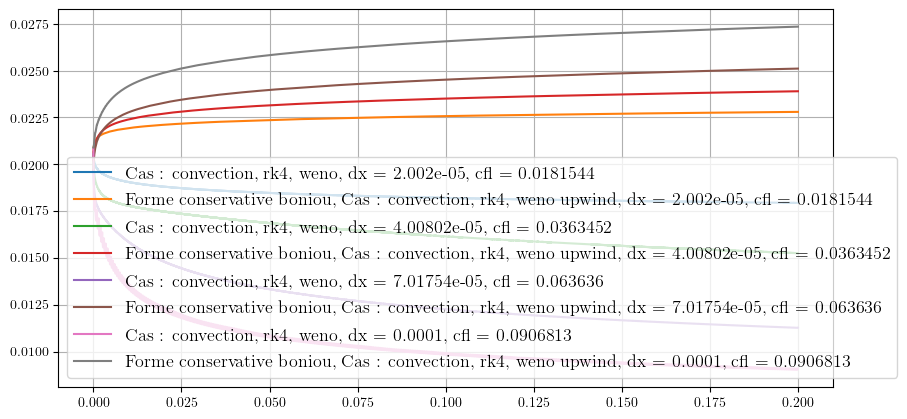

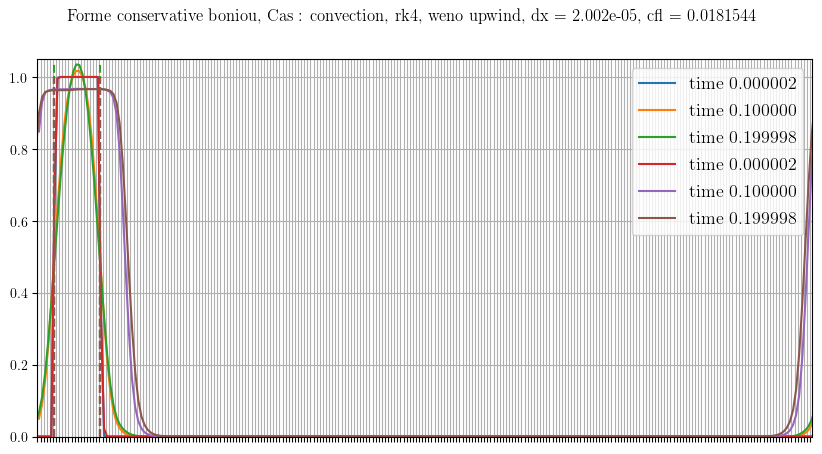

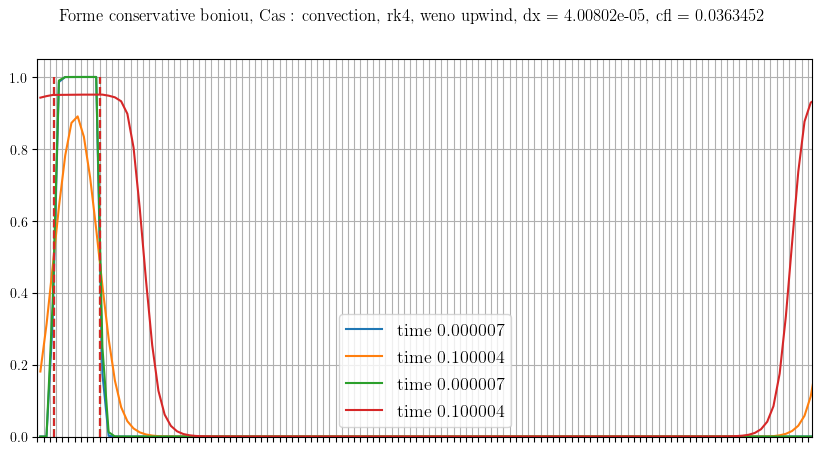

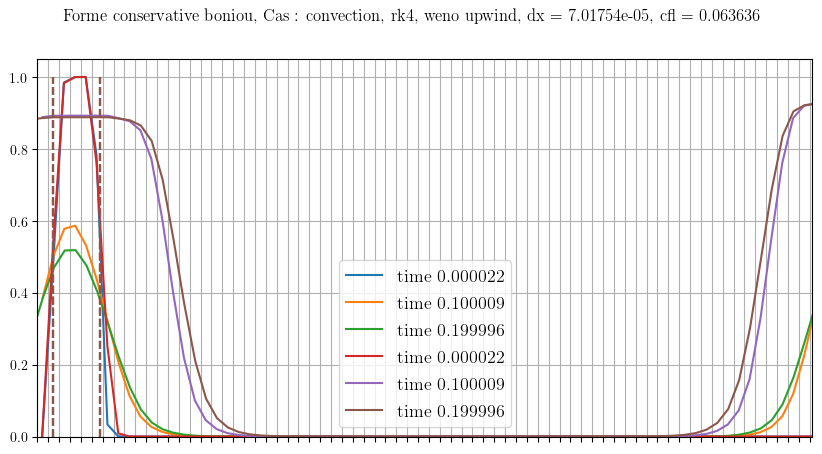

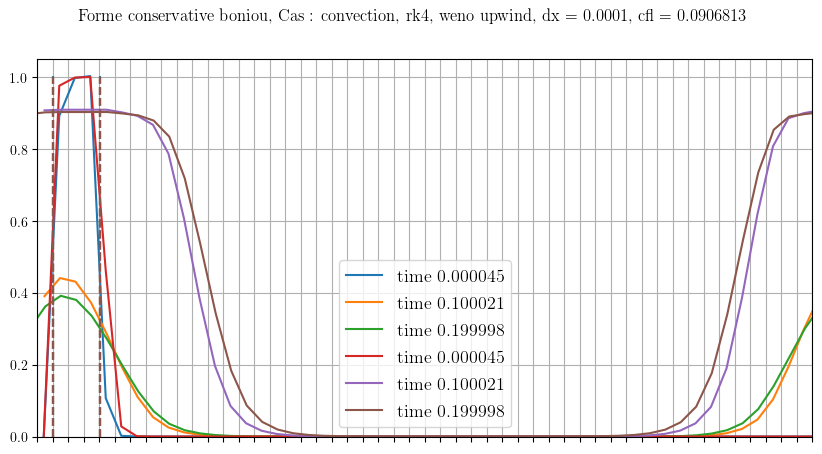

In [19]:
t_fin = 0.2
fig1, ax1 = plt.subplots(1)

for dx in [2*10**-5, 4*10**-5, 7*10**-5, 10*10**-5]:
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
    a = Plotter('decale')
    num_prop = NumericalProperties(dx=dx, schema='weno', time_scheme='rk4', phy_prop=phy_prop)
    print()
    prob_ref = Problem(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
    E0 = prob_ref.energy_m
    print(prob_ref.name)
    print('==========================')
    t, e = prob_ref.timestep(t_fin=t_fin, number_of_plots=2, debug=False, plotter=a)
    l = ax1.plot(t, e, label=prob_ref.name)
    n = len(e)
    i0 = int(n/5)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt / E0  # on a mult
    print('dE/dt = %g' % dedt_adim)

    num_prop = NumericalProperties(dx=dx, schema='weno upwind', time_scheme='rk4', phy_prop=phy_prop)
    print()
    prob_ref = ProblemConserv2(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
    E0 = prob_ref.energy_m
    print(prob_ref.name)
    print('==========================')
    t, e = prob_ref.timestep(t_fin=t_fin, number_of_plots=2, debug=False, plotter=a)
    l = ax1.plot(t, e, label=prob_ref.name)
    n = len(e)
    i0 = int(n/5)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt 
    print('dE/dt = %g' % dedt_adim)
    
    a.ax.set_ylim(0.,1.05)
    a.ax.set_xlim(0., phy_prop.Delta/4.)
    ax1.legend()
    ax1.grid(b=True)

In [ ]:
markers.shift(10**-6/7.)

~~~~~~~~~~~~~~~~~~~~~~~~~~

dt fourier
1.1335161290322582e-07
Cas : mixte, rk4, weno, dx = 5e-06, dt = 1.13352e-07, cfl = 0.00453406
dE/dt = -1.34172e-05

dt fourier
1.1335161290322582e-07
Forme conservative boniou, Cas : mixte, rk4, weno upwind, dx = 5e-06, dt = 1.13352e-07, cfl = 0.00453406
dE/dt = 9.4165e-08
~~~~~~~~~~~~~~~~~~~~~~~~~~

dt fourier
7.254503225806451e-08
Cas : mixte, rk4, weno, dx = 4e-06, dt = 7.2545e-08, cfl = 0.00362725
dE/dt = 7.44937e-05

dt fourier
7.254503225806451e-08
Forme conservative boniou, Cas : mixte, rk4, weno upwind, dx = 4e-06, dt = 7.2545e-08, cfl = 0.00362725
dE/dt = 6.63671e-07
~~~~~~~~~~~~~~~~~~~~~~~~~~

dt fourier
4.0814743185650987e-08
Cas : mixte, rk4, weno, dx = 3.0003e-06, dt = 4.08147e-08, cfl = 0.00272071
dE/dt = 1.60927e-06

dt fourier
4.0814743185650987e-08
Forme conservative boniou, Cas : mixte, rk4, weno upwind, dx = 3.0003e-06, dt = 4.08147e-08, cfl = 0.00272071
dE/dt = 2.19004e-07
~~~~~~~~~~~~~~~~~~~~~~~~~~

dt fourier
1.81362580645161

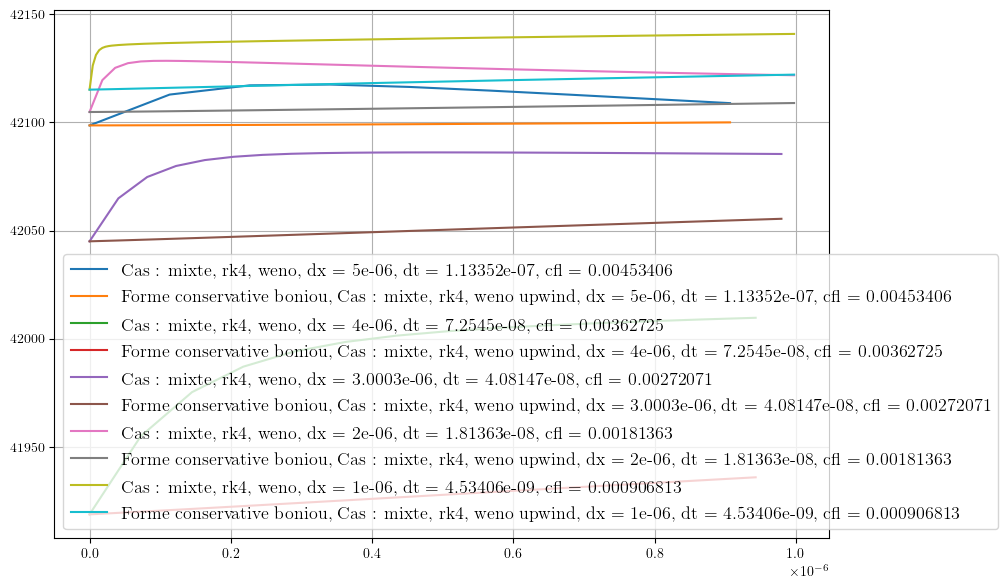

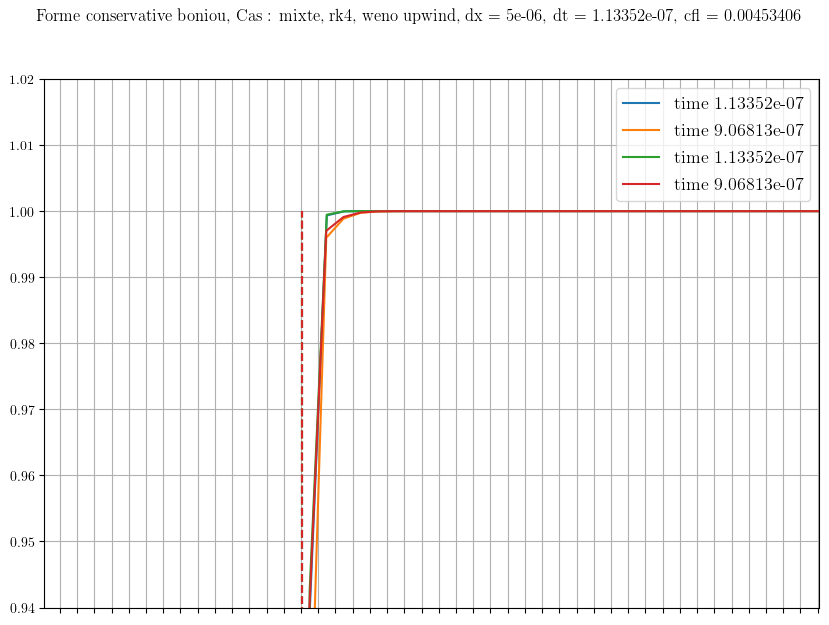

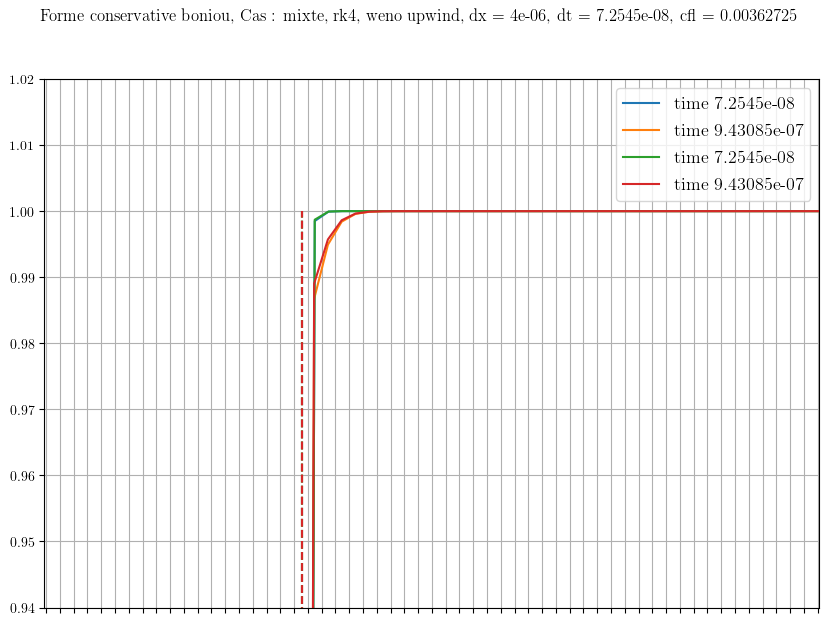

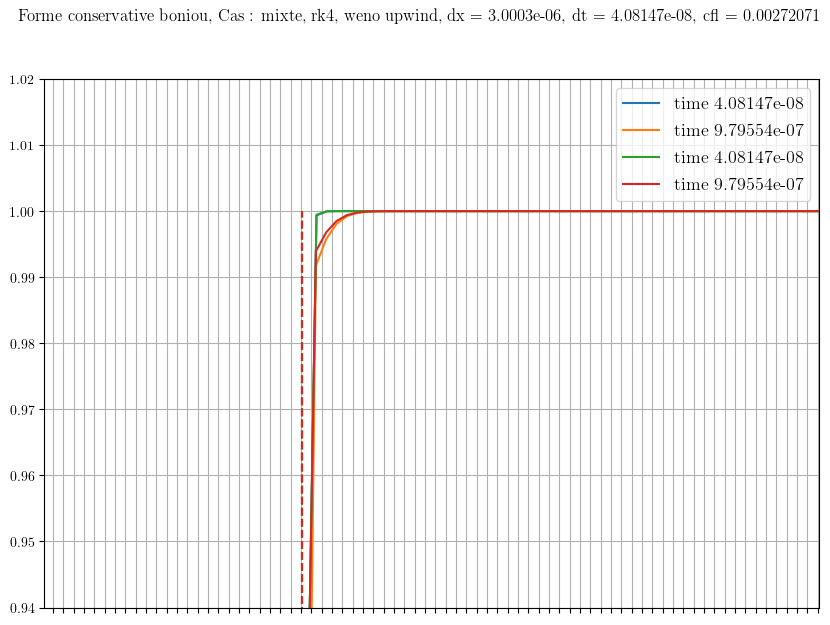

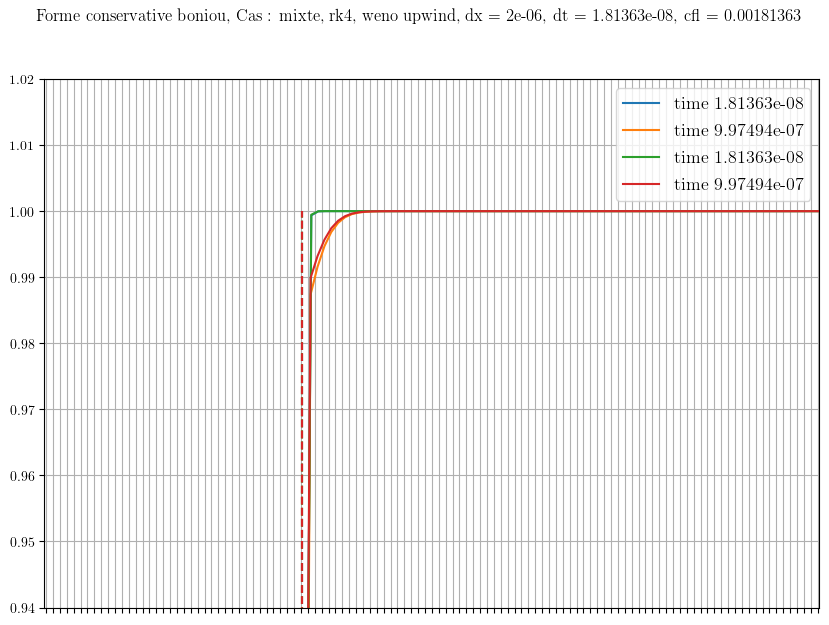

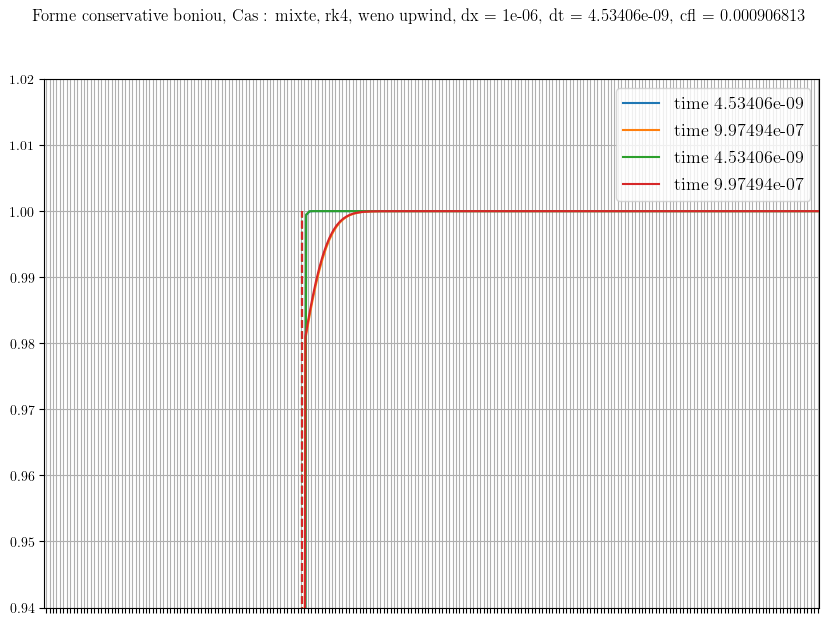

In [13]:
%matplotlib inline
rc('figure', figsize=(10,7))
rc('figure', dpi=100)
n = 1000
t_fin = 10**-6
fig1, ax1 = plt.subplots(1)


for dx in [5*10**-6, 4*10**-6, 3*10**-6, 2*10**-6, 1*10**-6]:
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
    a = Plotter('decale')
    num_prop = NumericalProperties(dx=dx, schema='weno', time_scheme='rk4', phy_prop=phy_prop)
    print()
    prob_ref = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
    E0 = prob_ref.energy
    print(prob_ref.name)
    print('==========================')
    t, e = prob_ref.timestep(n=n, t_fin=t_fin, number_of_plots=1, plotter=a)
    l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_ref.name)
    n = len(e)
    i0 = int(n/5)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt / E0  # on a mult
    print('dE/dt = %g' % dedt_adim)

    num_prop = NumericalProperties(dx=dx, schema='weno upwind', time_scheme='rk4', phy_prop=phy_prop)
    print()
    prob_ref = ProblemConserv2(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
    E0 = prob_ref.energy
    print(prob_ref.name)
    print('==========================')
    t, e = prob_ref.timestep(t_fin=t_fin, n=n, number_of_plots=1, plotter=a)
    l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_ref.name)
    n = len(e)
    i0 = int(n/5)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt 
    print('dE/dt = %g' % dedt_adim)
    
    a.ax.set_ylim(0.94,1.02)
    a.ax.set_xlim(prob_ref.markers.markers[0][0] - prob_ref.markers.diam / 4., prob_ref.markers.markers[0][0] + prob_ref.markers.diam / 2.,)
    ax1.legend()
    ax1.grid(b=True, which='both')